# Exploratory Data Analysis - Supermarket Sales

EDA ini bertujuan untuk memahami pola penjualan, performa produk, preferensi pelanggan, dan memberikan insight bisnis dari data transaksi supermarket.

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_theme()
sns.set_palette("pastel")

In [2]:
# 2. Load Data
df = pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# 3. Info Awal Dataset
print(df.shape)
print(df.columns)
print(df.dtypes)
df.isnull().sum()

(1003, 17)
Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


,0
Invoice ID,0
Branch,0
City,0
Customer type,79
Gender,0
Product line,43
Unit price,7
Quantity,20
Tax 5%,0
Total,0


In [4]:
# 4. Data Cleaning & Feature Engineering
df.dropna(inplace=True)  # Drop missing values
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour
df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()
df.reset_index(drop=True, inplace=True)

<ipython-input-4-4126481212>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])
<ipython-input-4-4126481212>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"])


## Statistik Deskriptif

In [5]:
# 5. Deskriptif Statistik
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Hour
count,865.000000,865.000000,865.000000,865.000000,865,865,865.000000,8.650000e+02,865.000000,865.000000,865.000000
mean,55.674127,5.590751,15.705700,329.819700,2019-02-14 12:15:48.901734144,2025-06-15 15:29:57.572254208,314.114000,4.761905e+00,15.705700,6.996301,14.996532
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2025-06-15 10:00:00,10.170000,4.761905e+00,0.508500,4.000000,10.000000
25%,33.260000,3.000000,6.287000,132.027000,2019-01-25 00:00:00,2025-06-15 12:46:00,125.740000,4.761905e+00,6.287000,5.600000,12.000000
50%,54.860000,6.000000,12.438000,261.198000,2019-02-14 00:00:00,2025-06-15 15:27:00,248.760000,4.761905e+00,12.438000,7.000000,15.000000
75%,77.950000,8.000000,23.094000,484.974000,2019-03-08 00:00:00,2025-06-15 18:22:00,461.880000,4.761905e+00,23.094000,8.500000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2025-06-15 20:59:00,993.000000,4.761905e+00,49.650000,10.000000,20.000000
std,26.417675,2.901374,11.815816,248.132129,NaN,NaN,236.316314,5.776500e-14,11.815816,1.718799,3.185796


## Visualisasi dan Analisis

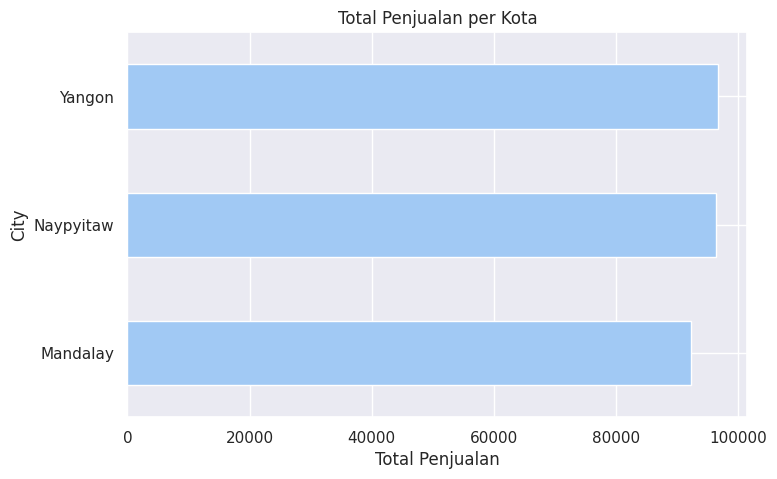

In [6]:
# Penjualan per Kota
kota = df.groupby("City")["Total"].sum().sort_values()
kota.plot(kind='barh', figsize=(8,5), title="Total Penjualan per Kota")
plt.xlabel("Total Penjualan")
plt.show()

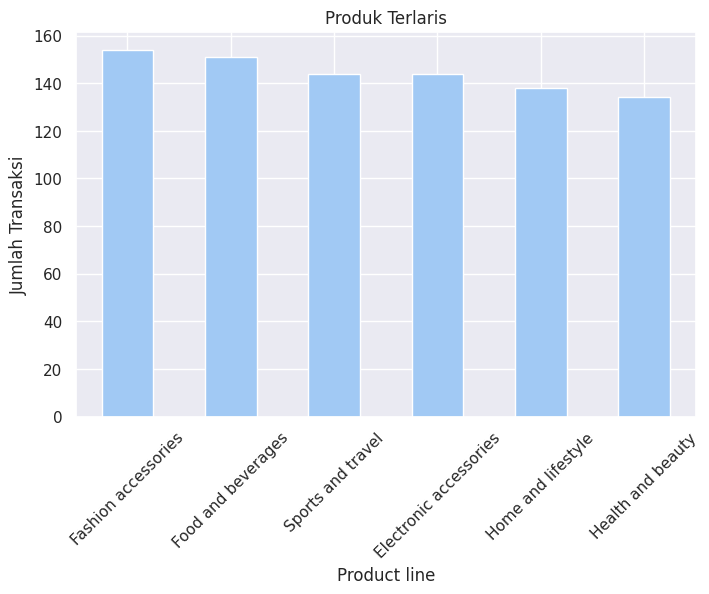

In [7]:
# Produk Terlaris
produk = df["Product line"].value_counts()
produk.plot(kind='bar', figsize=(8,5), title="Produk Terlaris")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

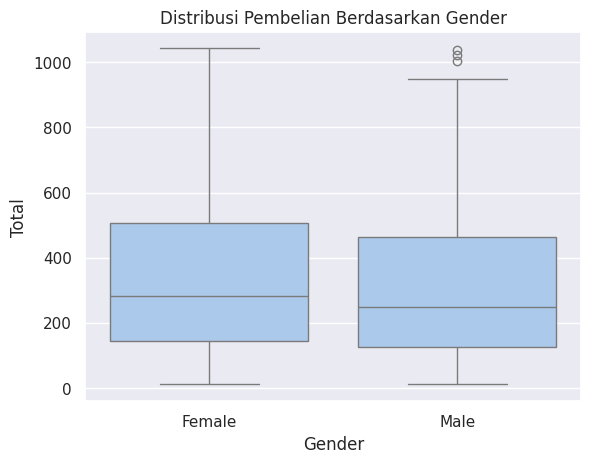

In [8]:
# Pembelian Berdasarkan Gender
sns.boxplot(data=df, x="Gender", y="Total")
plt.title("Distribusi Pembelian Berdasarkan Gender")
plt.show()

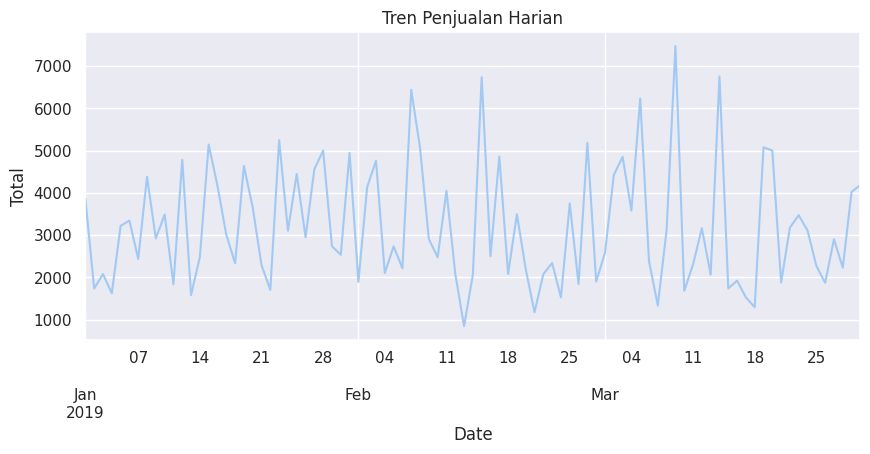

In [9]:
# Pembelian Harian
harian = df.groupby("Date")["Total"].sum()
harian.plot(figsize=(10,4), title="Tren Penjualan Harian")
plt.ylabel("Total")
plt.grid(True)
plt.show()

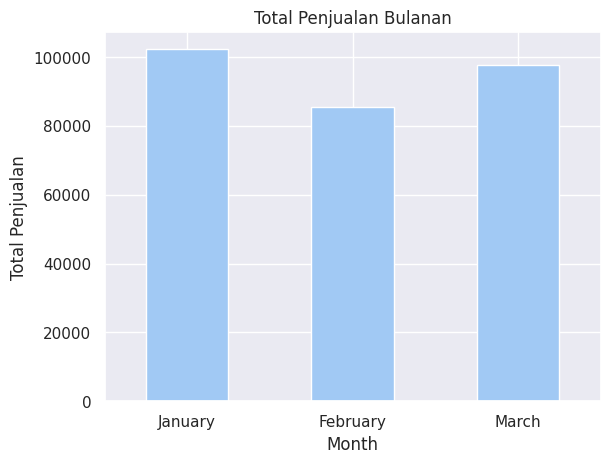

In [10]:
# Pembelian Bulanan
bulanan = df.groupby("Month")["Total"].sum()
bulanan = bulanan.reindex(["January", "February", "March"])
bulanan.plot(kind='bar', title="Total Penjualan Bulanan")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=0)
plt.show()

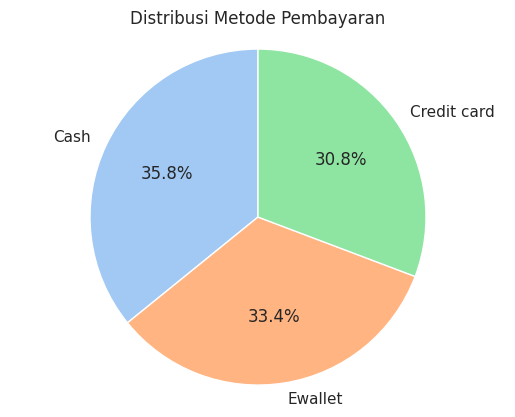

In [11]:
# Metode Pembayaran
pembayaran = df["Payment"].value_counts()
plt.pie(pembayaran, labels=pembayaran.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribusi Metode Pembayaran")
plt.axis("equal")
plt.show()

## Insight & Rekomendasi

- Kota dengan penjualan tertinggi: Kota Yangon mencatat total penjualan tertinggi, menjadikannya area strategis untuk fokus ekspansi dan kampanye promosi.

- Produk paling sering dibeli: Kategori Fashion Accessories mendominasi jumlah transaksi, menunjukkan permintaan pasar yang tinggi terhadap produk ini

- Perbandingan pembelian berdasarkan gender: Rata-rata total pembelian antara pelanggan pria dan wanita relatif setara, sehingga pendekatan pemasaran tidak perlu dibedakan secara signifikan berdasarkan gender.

- Tren penjualan harian dan bulanan: Terdapat tanggal-tanggal di bulan Februari yang mencatat frekuensi transaksi tertinggi, namun omzet bulanan terbesar justru terjadi pada bulan Januari. Hal ini mengindikasikan bahwa meskipun transaksi di Februari tinggi, nilai pembelian di Januari lebih besar dan lebih stabil.

- Metode pembayaran terbanyak: Sebagian besar pelanggan memilih Cash sebagai metode pembayaran, sehingga penting untuk memastikan sistem kas berjalan optimal dan efisien.

## Kesimpulan Akhir
Berdasarkan hasil eksplorasi data penjualan supermarket, dapat disimpulkan bahwa Kota Yangon merupakan pasar paling potensial dengan total penjualan tertinggi. Produk Fashion Accessories menjadi pilihan utama pelanggan, tanpa adanya perbedaan signifikan dalam perilaku belanja antara pria dan wanita. Analisis waktu menunjukkan bahwa meskipun frekuensi transaksi tertinggi terjadi di bulan Februari, omzet terbesar justru tercatat pada bulan Januari, menandakan potensi stabilitas nilai pembelian di awal tahun. Selain itu, metode pembayaran yang paling sering digunakan adalah cash, yang menunjukkan perlunya perhatian khusus terhadap pengelolaan kas di toko. Temuan-temuan ini dapat menjadi dasar strategi bisnis dalam pengelolaan produk, penentuan promosi, serta peningkatan layanan pelanggan ke depan.